# Fourier point source

In [1]:
%load_ext autoreload
%autoreload 2
import site
import sys
site.addsitedir('..')

In [2]:
import numpy as np
import jax.numpy as jnp
from  matplotlib import pyplot as plt
from src.utils import *
from src.projection import project, rotate
from src.interpolate import *

### Important: in the Fourier domain, the point is rotated in the fftshifted coordinates (i.e. 0 in the centre) - working now

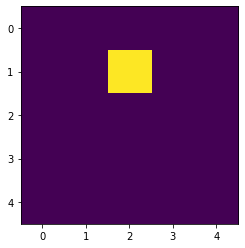

In [4]:
nx = 5
dx = 0.2

v = np.zeros([nx,nx,nx])
v[1,2,2] = 1
v = jnp.array(v)

plt.imshow(v[:,:,2])

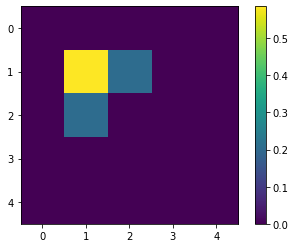

In [10]:
x_freq = jnp.fft.fftfreq(nx, dx)
y_freq = jnp.fft.fftfreq(nx, dx)
z_freq = jnp.fft.fftfreq(nx, dx)

x_grid = jnp.array([x_freq[1], len(x_freq)])
y_grid = jnp.array([y_freq[1], len(y_freq)])
z_grid = jnp.array([z_freq[1], len(z_freq)])


X, Y, Z = jnp.meshgrid(x_freq, y_freq, z_freq, indexing = 'xy')

angles = jnp.array([0,0,jnp.pi/4])

vr, _ = project(jnp.fft.ifftshift(v), x_grid, y_grid, z_grid, angles, "tri")
vr = jnp.fft.fftshift(vr.reshape(v.shape[0], v.shape[1]))
plt.imshow(vr)
plt.colorbar()

In [11]:
vr

DeviceArray([[0.        , 0.        , 0.        , 0.        , 0.        ],
             [0.        , 0.58578646, 0.20710678, 0.        , 0.        ],
             [0.        , 0.20710678, 0.        , 0.        , 0.        ],
             [0.        , 0.        , 0.        , 0.        , 0.        ],
             [0.        , 0.        , 0.        , 0.        , 0.        ]],            dtype=float32)

### Do the steps in the project function

#### Note:
For the point on the edge of the square as below and rotation by $\pi/4$, after rotation _of the coordinates_, the point appears in a corner, probably unexpectedly. However, this is the intended behaviour when one rotates the coordinates and the object is periodic.

This becomes clear when we track multiple points after the rotation, see ```Fourier_slice_rotation.ipynb```.

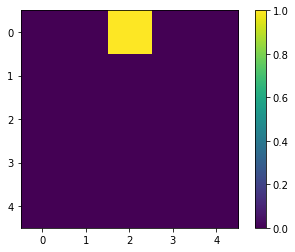

In [12]:
nx = 5
dx = 0.2

v = np.zeros([nx,nx,nx])
v[0,2,2] = 1

v = jnp.array(v)

plt.imshow(v[:,:,2]); plt.colorbar()

In [13]:
angles = jnp.array([0,0,jnp.pi/4])
slice_coords = rotate(x_grid, y_grid, angles)

In [16]:
slice_interp = interpolate(slice_coords, x_grid, y_grid, z_grid, jnp.fft.ifftshift(v), "nn")
slice_interp_2d = (jnp.fft.fftshift(slice_interp.reshape(v.shape[0], v.shape[1])))

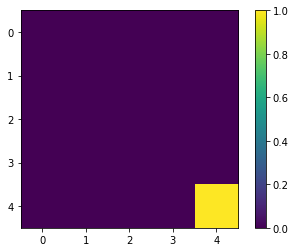

In [17]:
plt.imshow(slice_interp_2d); plt.colorbar()